In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [4]:
from datetime import datetime
start = "2012/01/01"
end = "2022/12/21"

start_date = datetime.strptime(start, '%Y/%m/%d')
end_date = datetime.strptime(end, '%Y/%m/%d')

print(start_date)

2012-01-01 00:00:00


In [5]:
stock ="GOOG"
data = yf.download(stock, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [7]:
data.reset_index(inplace = True)

In [8]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [9]:
ma_100_days = data.Close.rolling(100).mean()

In [10]:
ma_100_days

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2756    103.6147
2757    103.4723
2758    103.2449
2759    102.9905
2760    102.7204
Name: Close, Length: 2761, dtype: float64

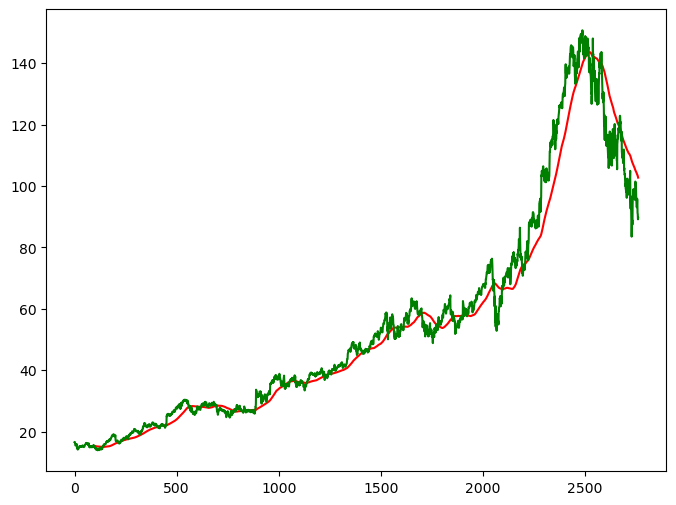

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, "r")
plt.plot(data.Close, "g")
plt.show()

In [12]:
ma_200_days = data.Close.rolling(200).mean()

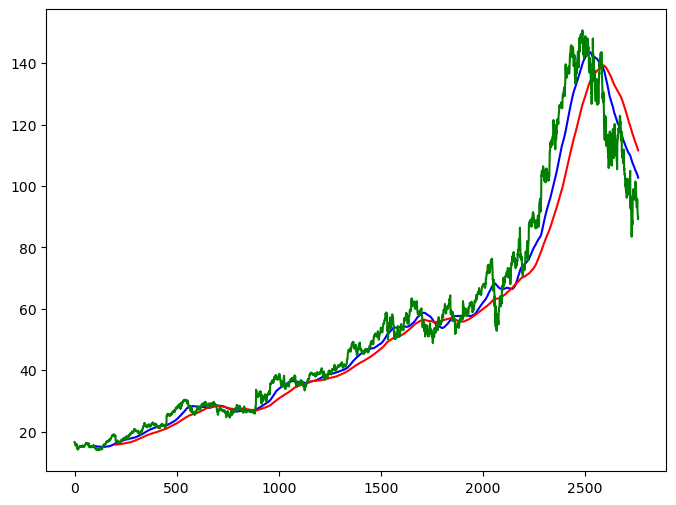

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, "b")
plt.plot(ma_200_days, "r")
plt.plot(data.Close, "g")
plt.show()

In [14]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])

In [16]:
data_test = pd.DataFrame(data.Close[int(len(data)*80): len(data)])

In [17]:
data_train.shape[0]

2208

In [18]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1) )

In [19]:
data_train_scale = Scaler.fit_transform(data_train)

In [20]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [21]:
x, y = np.array(x), np.array(y)

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\shafe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error')

In [25]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - loss: 0.0694
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - loss: 0.0064
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 0.0066
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - loss: 0.0054
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 0.0045
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0047
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0048
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 0.0049
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - loss: 0.0043
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - loss: 0.0038
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 0.0038
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 0.0046
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0035
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0034
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [43]:
pas_100_days = data_train.tail(100)

In [44]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [45]:
data_test_scale = Scaler.fit_transform(data_test)

In [46]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])


x, y = np.array(x), np.array(y)

In [51]:
y_predict = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [52]:
Scale =1/Scaler.scale_

In [53]:
y_predict = y_predict*Scale

In [54]:
y = y*Scale

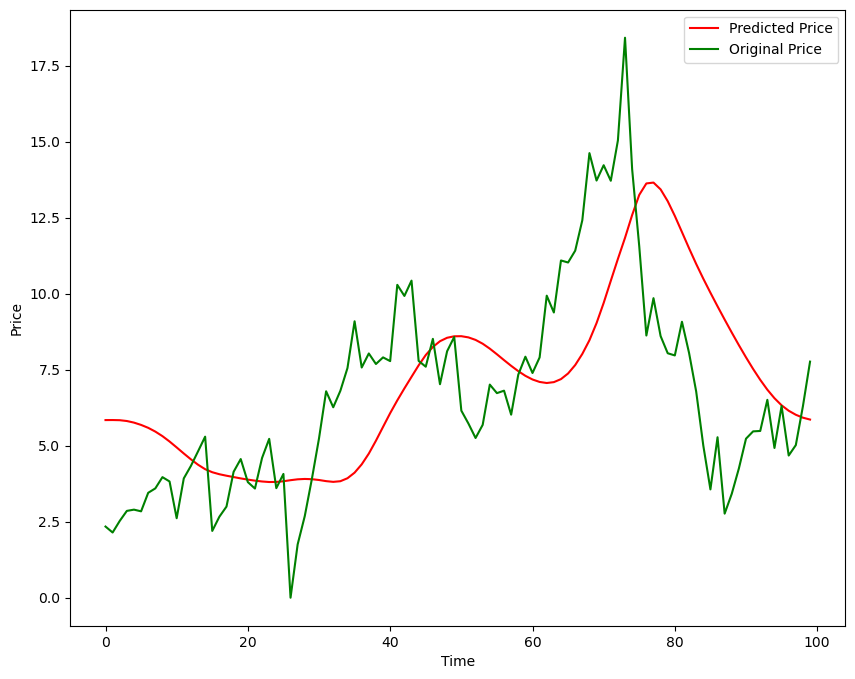

In [55]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [56]:
model.save("stock Predictions Model.keras")